# Exercise 12

In [1]:
#1. Take a picture of an apple and put it in the image folder in the notebook environment
#Check image folder



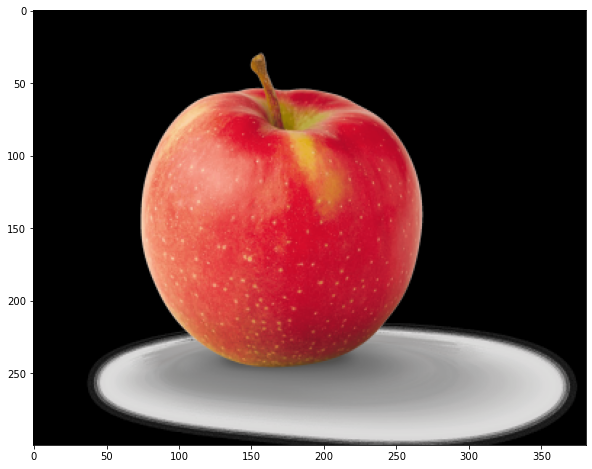

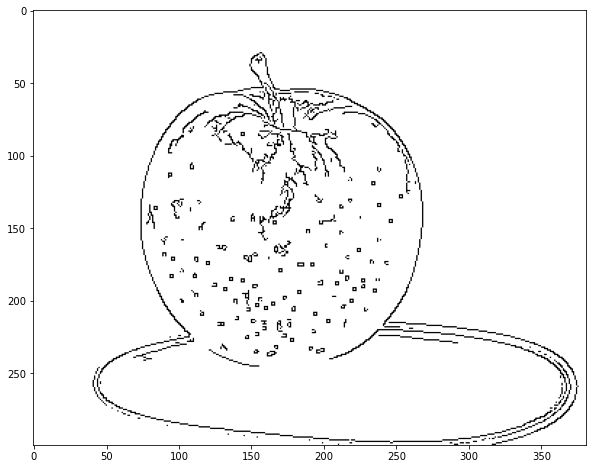

In [2]:
# 2. Find the contour of the apple
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../images/apple.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)
g = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edge = cv2.Canny(g, 60, 180)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(edge, cmap='Greys')

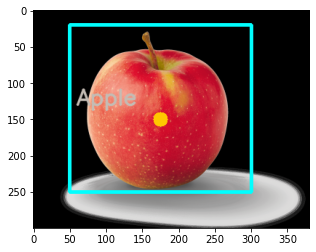

In [3]:
# Draw a yellow circle with the center placed on the center of the apple contour
# Draw a square that precisely holds the apple
draw_img = image.copy()        # Make a copy of the image
cv2.rectangle(draw_img,(50,20),(300,250),(0,255,255),3)
cv2.circle(draw_img,(175,150), radius=10, color=(255,200,0), thickness=-1) # negative thickness makes circle filled
font = cv2.FONT_HERSHEY_SIMPLEX 
textcolor = (196,188,180)
cv2.putText(draw_img,'Apple',(60,130),font, 1,textcolor,2,cv2.LINE_AA)
plt.imshow(draw_img)    # show the image

In [4]:
# Take a picture of three seperate apples.
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('../images/3apples.jpg', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
